In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve

In [2]:
df = pd.read_csv("After_Modifications.csv")
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,has_basement,yr_built,is_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1,13.854763,66.245110,1,0,0,3,7,4.543319,0,1955,0,98178,47.5112,-122.257,4.864881,90.825796
1,538000.0,3,3,16.681686,73.004564,2,0,0,3,7,4.766770,1,1951,1,98125,47.7210,-122.319,4.963411,103.604104
2,180000.0,2,1,12.458439,82.791984,1,0,0,3,6,4.375342,0,1933,0,98028,47.7379,-122.233,5.157289,106.065491
3,604000.0,4,3,15.654218,63.142536,1,0,0,5,7,4.498352,1,1965,0,98136,47.5208,-122.393,4.871252,86.097627
4,510000.0,3,2,15.090795,76.193073,1,0,0,3,8,4.675147,0,1987,0,98074,47.6168,-122.045,4.989725,102.796178
5,1225000.0,4,5,18.701424,106.488302,1,0,0,3,11,4.951361,1,2001,0,98053,47.6561,-122.005,5.272858,148.673761
6,257500.0,3,3,15.165293,71.307227,2,0,0,3,7,4.682647,0,1995,0,98003,47.3097,-122.327,5.079132,98.599468
7,291850.0,3,2,13.494221,81.852505,1,0,0,3,7,4.502030,0,1963,0,98198,47.4095,-122.315,4.953364,115.012615
8,229500.0,3,1,15.300371,73.893906,1,0,0,3,7,4.498352,1,1960,0,98146,47.5123,-122.337,4.985077,106.357200
9,323000.0,3,3,15.519939,70.235360,2,0,0,3,7,4.717709,0,2003,0,98038,47.3684,-122.031,5.105663,103.195241


In [3]:
y = df['price']
X = df.drop(columns = ['price'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

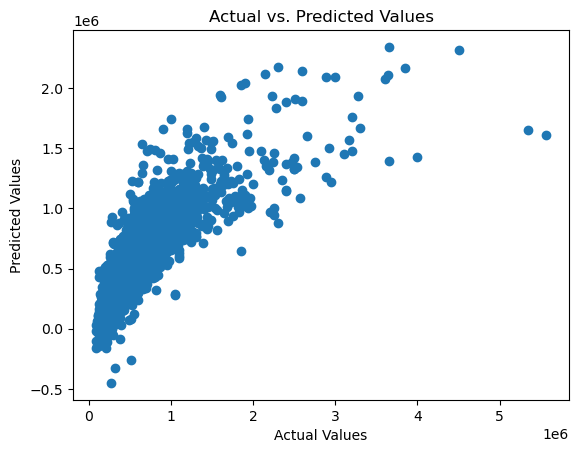

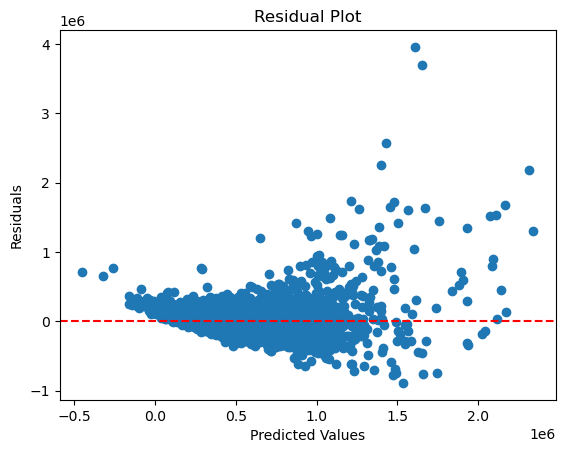

R-squared: 0.6495365697422827
Mean Absolute Error: 134535.01385333738
Mean Squared Error: 52981909152.62186
Root Mean Squared Error: 230177.99450125953


In [4]:

linear = LinearRegression()

linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Plot predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Create a residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.title("Residual Plot")
plt.show()

# Print evaluation metrics
print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


In [5]:
num_features = 5
rfe = RFE(linear, n_features_to_select = num_features)
rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]

In [6]:
selected_features

Index(['waterfront', 'is_renovated', 'lat', 'long', 'sqft_living15'], dtype='object')

In [7]:
# Re-split the data
y = df['price']
X_selected = X[selected_features]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_selected, y, test_size = 0.2, random_state = 42)


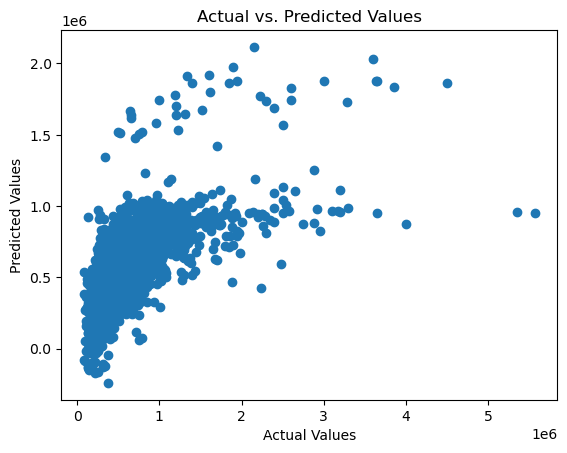

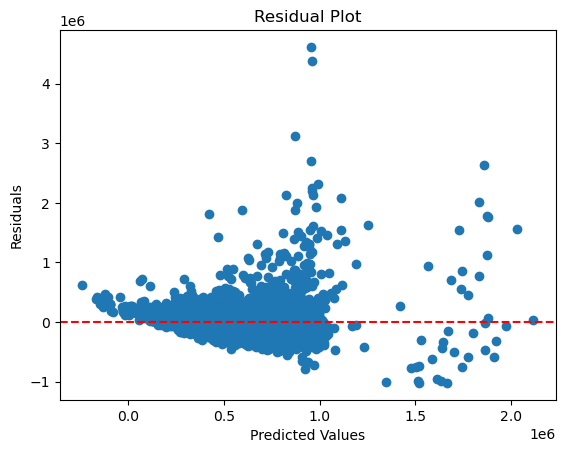

R-squared: 0.4403563284906151
Mean Absolute Error: 169800.17850002955
Mean Squared Error: 84605090294.14503
Root Mean Squared Error: 290869.54170924297


In [8]:
linear2 = LinearRegression()
# Fit the model
linear2.fit(X_train2, y_train2)
# Make predictions
# Make predictions on the test set
y_pred2 = linear2.predict(X_test2)

# Calculate R-squared
r_squared2 = r2_score(y_test2, y_pred2)

# Calculate mean absolute error
mae2 = mean_absolute_error(y_test2, y_pred2)

# Calculate mean squared error
mse2 = mean_squared_error(y_test2, y_pred2)

# Calculate root mean squared error
rmse2 = np.sqrt(mse2)

# Plot predicted vs. actual values
plt.scatter(y_test2, y_pred2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Create a residual plot
residuals2 = y_test2 - y_pred2
plt.scatter(y_pred2, residuals2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.title("Residual Plot")
plt.show()

# Print evaluation metrics
print("R-squared:", r_squared2)
print("Mean Absolute Error:", mae2)
print("Mean Squared Error:", mse2)
print("Root Mean Squared Error:", rmse2)

In [9]:
desired_alpha = 0.1
model = Lasso(alpha = desired_alpha)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Print the coefficients of the selected features (non-zero coefficients)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
selected_features = coefficients[coefficients['Coefficient'] != 0]
print("Selected Features:")
print(selected_features)

Mean Squared Error: 52981941624.68916
R-squared: 0.64953635494685
Selected Features:
          Feature    Coefficient
0        bedrooms   -4689.274946
1       bathrooms   60608.902251
2     sqft_living   19276.930369
3        sqft_lot     196.528214
4          floors    5485.052754
5      waterfront  596923.755385
6            view   64627.352003
7       condition   22833.790843
8           grade  147892.986415
9      sqft_above  120011.255071
10   has_basement   12255.780190
11       yr_built   -3191.464403
12   is_renovated   43788.826252
13        zipcode    -529.847354
14            lat  577499.793741
15           long -103942.802478
16  sqft_living15  143149.899457
17     sqft_lot15    -248.879630


In [10]:
# The correlation matrix
correlation_matrix = df.corr()

# Calculate the correlation with the target variable 'price'
target_correlation = correlation_matrix['price']

# Select features with an absolute correlation greater than or equal to 0.5 (both positive and negative)
relevant_features = target_correlation[(target_correlation >= 0.5) | (target_correlation <= -0.5)].index.tolist()

In [11]:
relevant_features

['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']

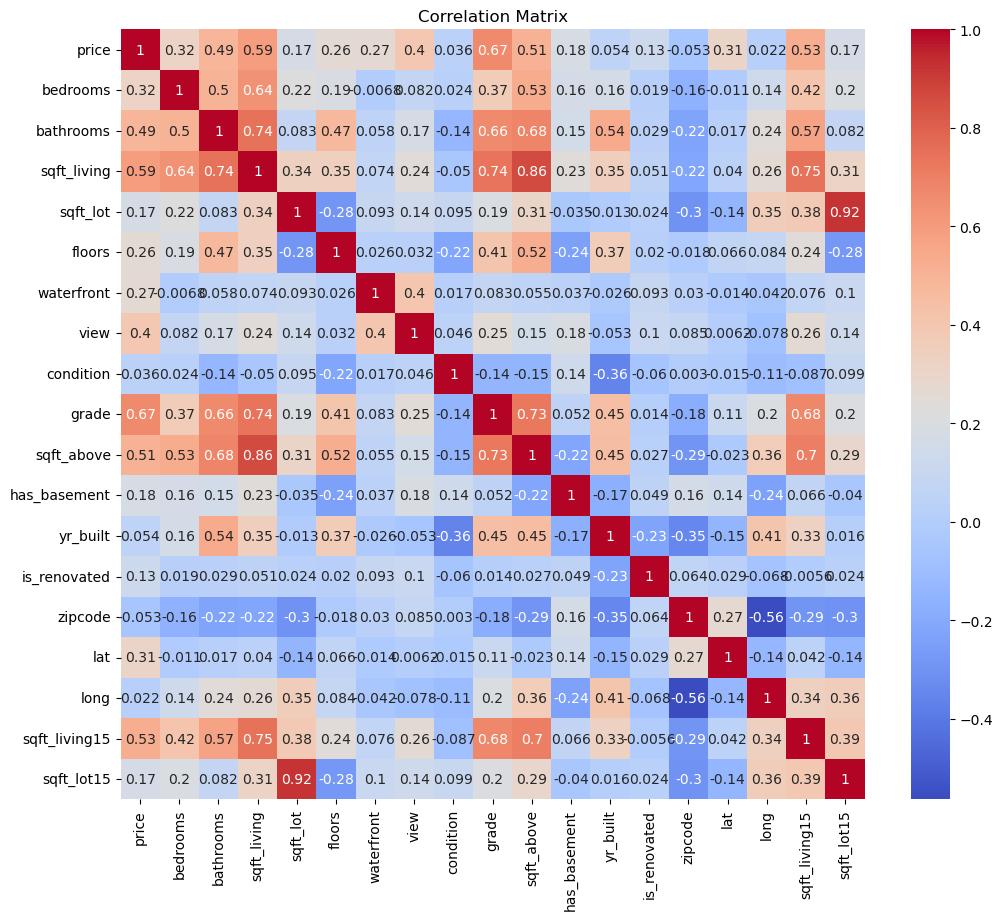

In [13]:
# Figure size
plt.figure(figsize = (12, 10))

# Heatmap
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")

# Title
plt.title("Correlation Matrix")

# Show
plt.show()

In [14]:
# Re-split the data
y = df['price']
X_selected2 = X[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_selected2, y, test_size = 0.2, random_state = 42)

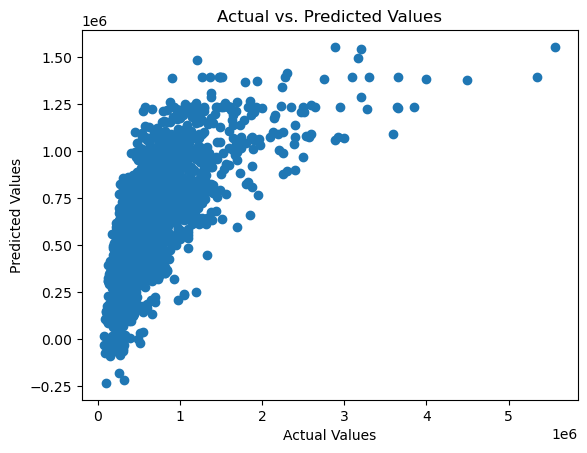

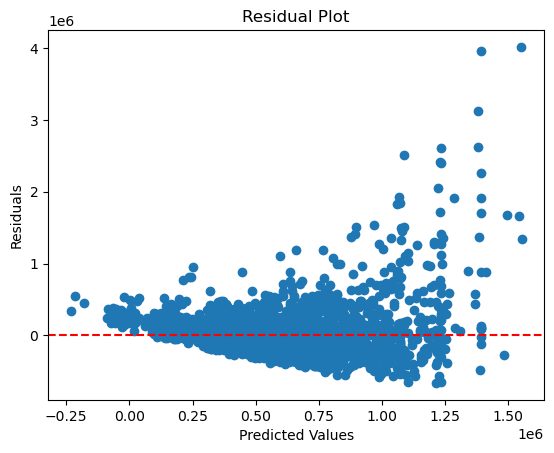

R-squared: 0.48189698164201766
Mean Absolute Error: 170422.22652672217
Mean Squared Error: 78325110925.71358
Root Mean Squared Error: 279866.2375595055


In [15]:
# Initializing and training a linear regression model
linear3 = LinearRegression()
# Fit the model
linear3.fit(X_train3, y_train3)
# Make predictions
# Make predictions on the test set
y_pred3 = linear3.predict(X_test3)

# Calculate R-squared
r_squared3 = r2_score(y_test3, y_pred3)

# Calculate mean absolute error
mae3 = mean_absolute_error(y_test3, y_pred3)

# Calculate mean squared error
mse3 = mean_squared_error(y_test3, y_pred3)

# Calculate root mean squared error
rmse3 = np.sqrt(mse3)

# Plot predicted vs. actual values
plt.scatter(y_test3, y_pred3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Create a residual plot
residuals3 = y_test3 - y_pred3
plt.scatter(y_pred3, residuals3)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.title("Residual Plot")
plt.show()

# Print evaluation metrics
print("R-squared:", r_squared3)
print("Mean Absolute Error:", mae3)
print("Mean Squared Error:", mse3)
print("Root Mean Squared Error:", rmse3)

In [16]:
# Instantiate KFold with 5 splits and train the model. 
k = KFold(n_splits = 10, shuffle = True, random_state = 42)

# Use cross_val_score to measure the accuracy of the model.
accuracy = cross_val_score(linear, X, y, cv = k) # Splitting is taken care of

# Print the average accuracy score  
print("The accuracy using cross validation is: ", accuracy)

# The correct method to print the cross validation accuracy
average_accuracy = np.mean(accuracy)
print(f'Average Accuracy: {average_accuracy:.2f}')

The accuracy using cross validation is:  [0.64912445 0.65027799 0.65880712 0.59911667 0.60128053 0.69281396
 0.65824052 0.65466011 0.68553941 0.65672978]
Average Accuracy: 0.65


In [17]:
# Training and testing score using learning_curve with cv = 5 and train_size = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(linear, X, y, cv = k, train_sizes = np.linspace(0.1, 1.0, 10)) # Automatically handles splitting the data.

# Average score of training and testing
avg_train = np.mean(train_scores, axis = 1)
avg_test = np.mean(test_scores, axis = 1)

# Print the average scores
for i, train_size in enumerate(train_sizes): # Since it prints each training and testing score for each fold (each training size)
    print(f"Train Size: {train_size:.1f}, Average Training Score: {avg_train[i]:.2f}, Average Testing Score: {avg_test[i]:.2f}")

Train Size: 1945.0, Average Training Score: 0.66, Average Testing Score: 0.64
Train Size: 3890.0, Average Training Score: 0.65, Average Testing Score: 0.64
Train Size: 5835.0, Average Training Score: 0.64, Average Testing Score: 0.65
Train Size: 7780.0, Average Training Score: 0.64, Average Testing Score: 0.65
Train Size: 9725.0, Average Training Score: 0.64, Average Testing Score: 0.65
Train Size: 11670.0, Average Training Score: 0.64, Average Testing Score: 0.65
Train Size: 13615.0, Average Training Score: 0.64, Average Testing Score: 0.65
Train Size: 15560.0, Average Training Score: 0.65, Average Testing Score: 0.65
Train Size: 17505.0, Average Training Score: 0.65, Average Testing Score: 0.65
Train Size: 19451.0, Average Training Score: 0.65, Average Testing Score: 0.65


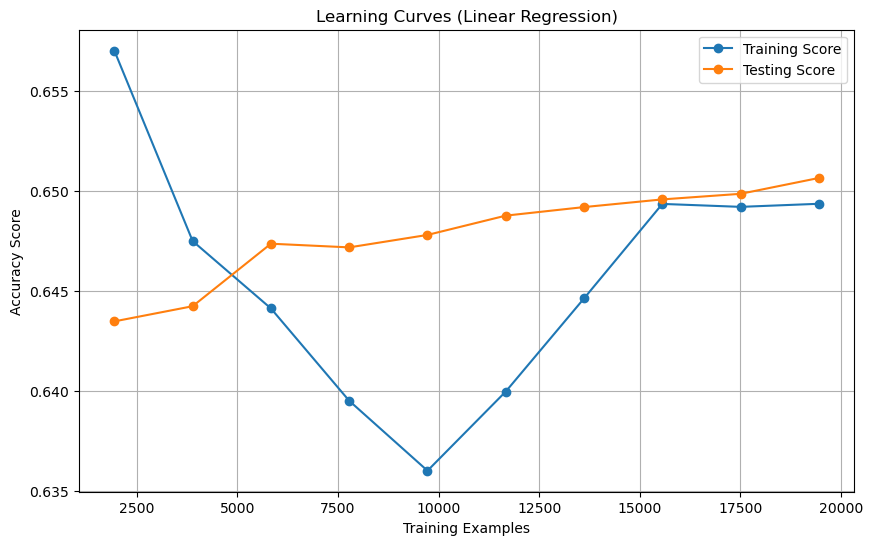

In [18]:
# Plot the learning curves 
plt.figure(figsize = (10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis = 1), 'o-', label = 'Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis = 1), 'o-', label = 'Testing Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves (Linear Regression)')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()